In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.probability import FreqDist
import contractions
import string
import wordninja

In [2]:
data = pd.read_csv("Suicide_Detection.csv")
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [4]:
#drop Unnamed: 0
data.drop(columns = ["Unnamed: 0"], inplace = True)

In [5]:
# def clean_text(text):
#     text = text.lower()
#     ## remove \n \t and non-alphanumeric
#     text = re.sub("(\\t|\\n)", " ", text)
#     text = re.sub("[^a-zA-Z']", " ", text)
#     text = re.sub("(?:_|[^a-z0-9_:])[;:=]+[\)\(\-\[\]\/|DPO]", "", text)
#     text = re.sub("[0-9]+", "", text)
#     text = text.strip()
#     # expanding the contractions
#     text = ' '.join([contractions.fix(x) for x in text.split(" ")])
#     return text.strip()

# data["text"] = data["text"].apply(lambda x: clean_text(x))


In [5]:
def clean_text(text):
    text = text.lower()
    ## remove \n \t and non-alphanumeric
    text = re.sub("(\\t|\\n)", " ", text)
    text = re.sub("[^a-zA-Z']", " ", text)
    text = re.sub("(?:_|[^a-z0-9_:])[;:=]+[\)\(\-\[\]\/|DPO]", "", text)
    text = re.sub("[0-9]+", "", text)
    text = text.strip()
    # expanding the contractions
    text = ' '.join([contractions.fix(x) for x in text.split(" ")])
    # split joint words
    text = ' '.join(wordninja.split(text))
    return text.strip()

data["text"] = data["text"].apply(lambda x: clean_text(x))

In [18]:
# from spellchecker import SpellChecker

# def clean_text(text):
#     text = text.lower()
#     ## remove \n \t and non-alphanumeric
#     text = re.sub("(\\t|\\n)", " ", text)
#     text = re.sub("[^a-zA-Z']", " ", text)
#     text = re.sub("(?:_|[^a-z0-9_:])[;:=]+[\)\(\-\[\]\/|DPO]", "", text)
#     text = re.sub("[0-9]+", "", text)
#     text = text.strip()
#     # expanding the contractions
#     text = ' '.join([contractions.fix(x) for x in text.split(" ")])
#     # split joint words
#     text = ' '.join(wordninja.split(text))
#     # spell correction
#     spell = SpellChecker()
#     words = text.split()
#     corrected_words = []
#     for word in words:
#         corrected_word = spell.correction(word)
#         if corrected_word is not None:
#             corrected_words.append(corrected_word)
#         else:
#             corrected_words.append(word)
#     text = ' '.join(corrected_words)
#     return text.strip()

# data["text"] = data["text"].apply(lambda x: clean_text(x))


KeyboardInterrupt: 

In [10]:
#data pre-processing - STEMMING
def stem_preprocess_text(text_list):
    processed_text = []
     
    #Tokenize words
    tokens = [word_tokenize(text) for text in text_list]
    
    #Remove stop words
    stop_list = stopwords.words('english')
    stop_list.append("filler")
    text_stop = [[word for word in doc if word.lower() not in stop_list] for doc in tokens]
    
    #Stemming
    stemmer = PorterStemmer()
    text_stem = [[stemmer.stem(word) for word in doc] for doc in text_stop]
    
    return text_stem


In [11]:
# Put each row of the 'text' column into a list on its own
text_list = data['text'].tolist()

# Preprocess the text_list
stem_processed_text = stem_preprocess_text(text_list)

# Add the processed_text list as a new column in the dataframe
data['stemmed_processed_text'] = stem_processed_text

# Preview the processed data
print(data.head())

                                                text        class  \
0  ex wife threatening suicide recently i left my...      suicide   
1  am i weird i do not get affected by compliment...  non-suicide   
2  finally is almost over so i can never hear has...  non-suicide   
3       i need help just help me i am crying so hard      suicide   
4  i m so lost hello my name is adam and i ve bee...      suicide   

                           lemmatized_processed_text  \
0  [ex, wife, threatening, suicide, recently, lef...   
1  [weird, get, affected, compliment, coming, som...   
2  [finally, almost, never, hear, bad, year, ever...   
3                      [need, help, help, cry, hard]   
4  [lost, hello, name, adam, struggling, year, af...   

                              stemmed_processed_text  
0  [ex, wife, threaten, suicid, recent, left, wif...  
1  [weird, get, affect, compliment, come, someon,...  
2  [final, almost, never, hear, bad, year, ever, ...  
3                      [need

In [7]:
#data pre-processing - LEMMATIZATION
def lemma_preprocess_text(text_list):
    processed_text = []
     
    #Tokenize words
    tokens = [word_tokenize(text) for text in text_list]
    
    #Remove stop words
    stop_list = stopwords.words('english')
    stop_list.append("filler")
    text_stop = [[word for word in doc if word.lower() not in stop_list] for doc in tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text_lemma = [[lemmatizer.lemmatize(word) for word in doc] for doc in text_stop]
    
    return text_lemma

In [8]:
# Put each row of the 'text' column into a list on its own
text_list = data['text'].tolist()

# Preprocess the text_list
lemma_processed_text = lemma_preprocess_text(text_list)

# Add the processed_text list as a new column in the dataframe
data['lemmatized_processed_text'] = lemma_processed_text

# Preview the processed data
print(data.head())

                                                text        class  \
0  ex wife threatening suicide recently i left my...      suicide   
1  am i weird i do not get affected by compliment...  non-suicide   
2  finally is almost over so i can never hear has...  non-suicide   
3       i need help just help me i am crying so hard      suicide   
4  i m so lost hello my name is adam and i ve bee...      suicide   

                           lemmatized_processed_text  
0  [ex, wife, threatening, suicide, recently, lef...  
1  [weird, get, affected, compliment, coming, som...  
2  [finally, almost, never, hear, bad, year, ever...  
3                      [need, help, help, cry, hard]  
4  [lost, hello, name, adam, struggling, year, af...  


In [12]:
data

,text,class,lemmatized_processed_text,stemmed_processed_text
0,ex wife threatening suicide recently i left my...,suicide,"[ex, wife, threatening, suicide, recently, lef...","[ex, wife, threaten, suicid, recent, left, wif..."
1,am i weird i do not get affected by compliment...,non-suicide,"[weird, get, affected, compliment, coming, som...","[weird, get, affect, compliment, come, someon,..."
2,finally is almost over so i can never hear has...,non-suicide,"[finally, almost, never, hear, bad, year, ever...","[final, almost, never, hear, bad, year, ever, ..."
3,i need help just help me i am crying so hard,suicide,"[need, help, help, cry, hard]","[need, help, help, cri, hard]"
4,i m so lost hello my name is adam and i ve bee...,suicide,"[lost, hello, name, adam, struggling, year, af...","[lost, hello, name, adam, struggl, year, afrai..."
...,...,...,...,...
232069,if you do not like rock then your not going to...,non-suicide,"[like, rock, going, get, anything, go, http, m...","[like, rock, go, get, anyth, go, http, music, ..."
232070,you how you can tell i have so many friends an...,non-suicide,"[tell, many, friend, lonely, everything, depri...","[tell, mani, friend, lone, everyth, depriv, pr..."
232071,pee probably tastes like salty tea can someone...,non-suicide,"[pee, probably, taste, like, salty, tea, someo...","[pee, probabl, tast, like, salti, tea, someon,..."
232072,the usual stuff you find here i'm not posting ...,suicide,"[usual, stuff, find, 'm, posting, sympathy, pi...","[usual, stuff, find, 'm, post, sympathi, piti,..."


In [13]:
data.to_csv('preprocessed_data_new.csv', index=False)

In [12]:
#suicide data
suicide_data = data[data['class'] == 'suicide']

#non-suicide data
non_suicide_data = data[data['class'] == 'non-suicide']

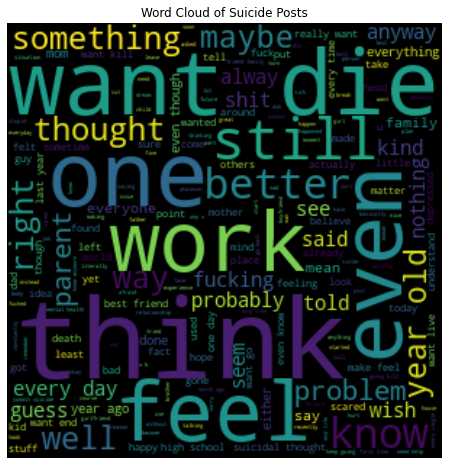

In [13]:
#SUICIDE DATA - word cloud

# extract the processed text column as a list of lists

suicide_processed_text = suicide_data['lemmatized_processed_text'].tolist()

# join each inner list into a single string
suicide_text = [" ".join(x) for x in suicide_processed_text]

# join the list of strings into a single string
suicide_text = " ".join(suicide_text)

# tokenize the words
suicide_tokens = word_tokenize(suicide_text)

# create a word cloud
suicide_wordcloud = WordCloud(background_color="black", height=300, width=300).generate(" ".join(suicide_tokens))

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(suicide_wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Suicide Posts")
plt.axis("off")
plt.show()



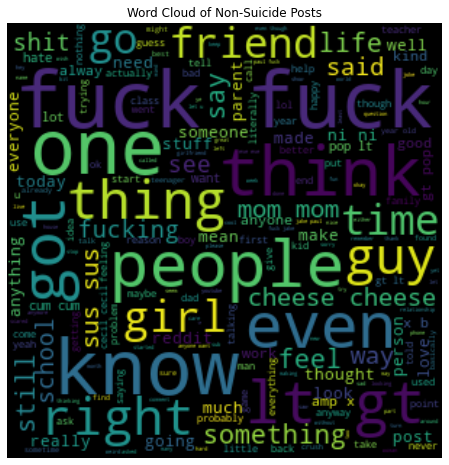

In [14]:
#NONSUICIDE DATA - word cloud

# extract the processed text column as a list of lists

non_suicide_processed_text = non_suicide_data['lemmatized_processed_text'].tolist()

# join each inner list into a single string
non_suicide_text = [" ".join(x) for x in non_suicide_processed_text]

# join the list of strings into a single string
non_suicide_text = " ".join(non_suicide_text)

# tokenize the words
non_suicide_tokens = word_tokenize(non_suicide_text)

# create a word cloud
non_suicide_wordcloud = WordCloud(background_color="black", height=300, width=300).generate(" ".join(non_suicide_tokens))

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(non_suicide_wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Non-Suicide Posts")
plt.axis("off")
plt.show()



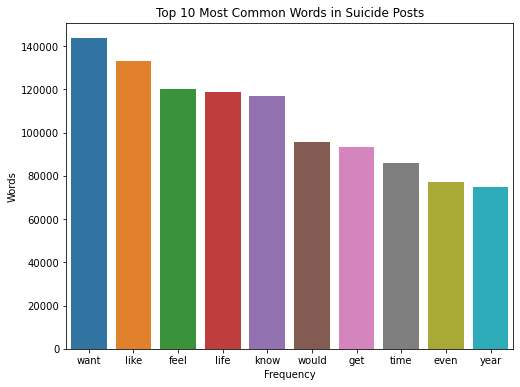

In [15]:
#SUICIDE DATA
# extract the processed text column as a list of lists
suicide_processed_text = suicide_data['lemmatized_processed_text'].tolist()

# join each inner list into a single string
suicide_text = [" ".join(x) for x in suicide_processed_text]

# join the list of strings into a single string
suicide_text = " ".join(suicide_text)

# tokenize the words
suicide_tokens = word_tokenize(suicide_text)

# calculate the frequency distribution of the words
fdist = FreqDist(suicide_tokens)

# Plot the top 10 most common words
plt.figure(figsize=(8, 6))
suicide_most_common = fdist.most_common(10)
sns.barplot(x=[word for word, freq in suicide_most_common], y=[freq for word, freq in suicide_most_common])
plt.ylabel("Words")
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Words in Suicide Posts")
plt.show()


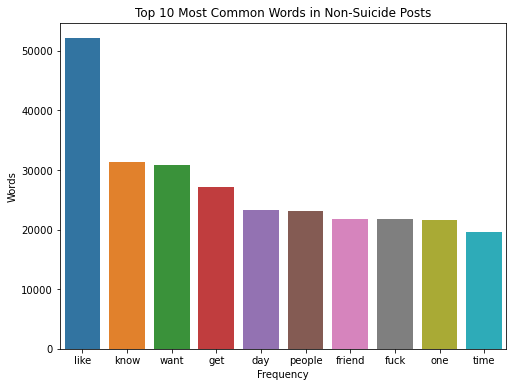

In [16]:
#NON-SUICIDE DATA
# extract the processed text column as a list of lists
non_suicide_processed_text = non_suicide_data['lemmatized_processed_text'].tolist()

# join each inner list into a single string
non_suicide_text = [" ".join(x) for x in non_suicide_processed_text]

# join the list of strings into a single string
non_suicide_text = " ".join(non_suicide_text)

# tokenize the words
non_suicide_tokens = word_tokenize(non_suicide_text)

# calculate the frequency distribution of the words
fdist = FreqDist(non_suicide_tokens)

# Plot the top 10 most common words
plt.figure(figsize=(8, 6))
non_suicide_most_common = fdist.most_common(10)
sns.barplot(x=[word for word, freq in non_suicide_most_common], y=[freq for word, freq in non_suicide_most_common])
plt.ylabel("Words")
plt.xlabel("Frequency")
plt.title("Top 10 Most Common Words in Non-Suicide Posts")
plt.show()


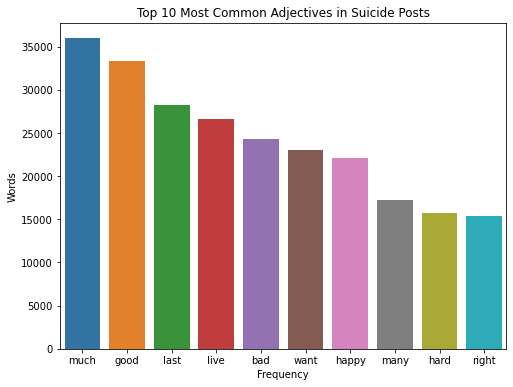

In [17]:
#SUICIDE DATA

# POS tag the words
suicide_tagged_words = nltk.pos_tag(suicide_tokens)

# Extract only the adjectives
suicide_adj_list = [word for word, pos in suicide_tagged_words if pos == 'JJ']

# Calculate the frequency of the adjectives
fdist = FreqDist(suicide_adj_list)

# Plot the top 10 most common adjectives
plt.figure(figsize=(8, 6))
suicide_most_common_jj = fdist.most_common(10)
sns.barplot(x=[word for word, freq in suicide_most_common_jj], y=[freq for word, freq in suicide_most_common_jj])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Common Adjectives in Suicide Posts")
plt.show()

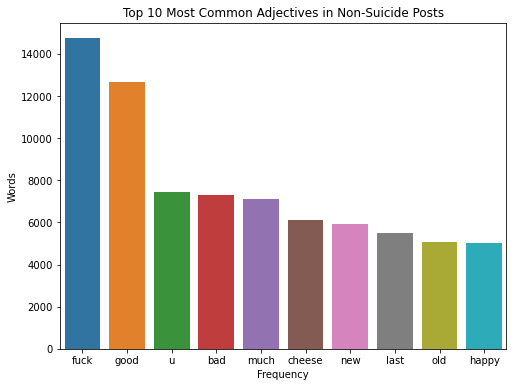

In [18]:
#NON-SUICIDE DATA

# POS tag the words
non_suicide_tagged_words = nltk.pos_tag(non_suicide_tokens)

# Extract only the adjectives
non_suicide_adj_list = [word for word, pos in non_suicide_tagged_words if pos == 'JJ']

# Calculate the frequency of the adjectives
fdist = FreqDist(non_suicide_adj_list)

# Plot the top 10 most common adjectives
plt.figure(figsize=(8, 6))
non_suicide_most_common_jj = fdist.most_common(10)
sns.barplot(x=[word for word, freq in non_suicide_most_common_jj], y=[freq for word, freq in non_suicide_most_common_jj])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Common Adjectives in Non-Suicide Posts")
plt.show()

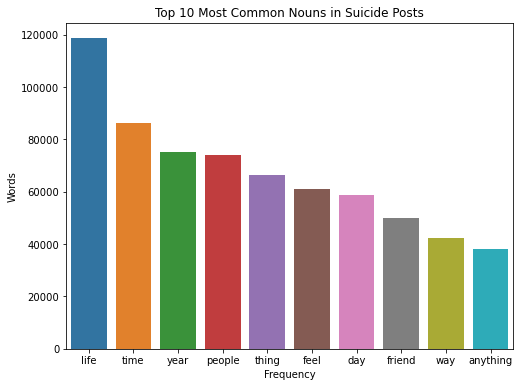

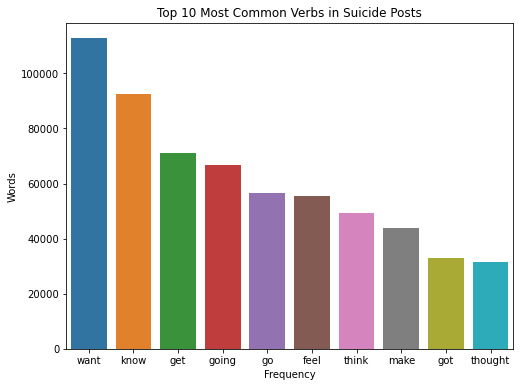

In [19]:
#SUICIDE DATA

suicide_nouns = [word for word, pos in suicide_tagged_words if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
suicide_verbs = [word for word, pos in suicide_tagged_words if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']]

# Use FreqDist to get the frequency of each word
suicide_noun_fdist = nltk.FreqDist(suicide_nouns)
suicide_verb_fdist = nltk.FreqDist(suicide_verbs)

# Get the most common nouns and verbs
suicide_most_common_nouns = suicide_noun_fdist.most_common(10)
suicide_most_common_verbs = suicide_verb_fdist.most_common(10)

# Plot the top 10 most common nouns
plt.figure(figsize=(8, 6))
sns.barplot(x=[word for word, freq in suicide_most_common_nouns], y=[freq for word, freq in suicide_most_common_nouns])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Common Nouns in Suicide Posts")
plt.show()

# Plot the top 10 most common verbs
plt.figure(figsize=(8, 6))
sns.barplot(x=[word for word, freq in suicide_most_common_verbs], y=[freq for word, freq in suicide_most_common_verbs])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Common Verbs in Suicide Posts")
plt.show()



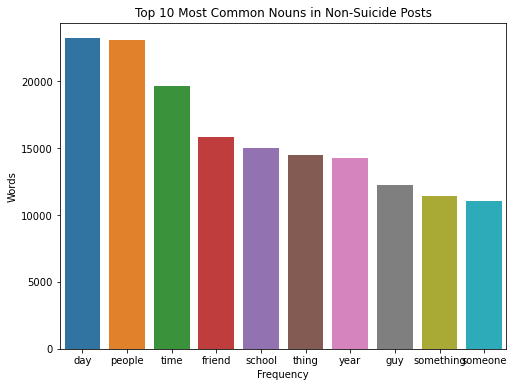

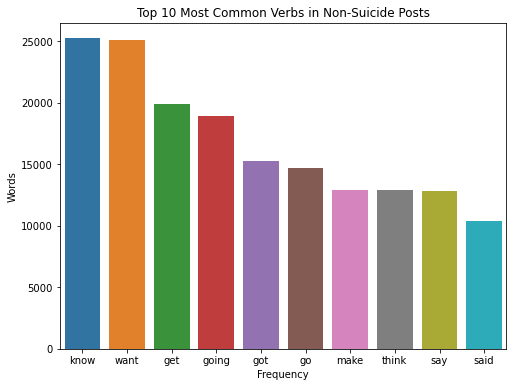

In [20]:
#NON-SUICIDE DATA

non_suicide_nouns = [word for word, pos in non_suicide_tagged_words if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
non_suicide_verbs = [word for word, pos in non_suicide_tagged_words if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']]

# Use FreqDist to get the frequency of each word
non_suicide_noun_fdist = nltk.FreqDist(non_suicide_nouns)
non_suicide_verb_fdist = nltk.FreqDist(non_suicide_verbs)

# Get the most common nouns and verbs
non_suicide_most_common_nouns = non_suicide_noun_fdist.most_common(10)
non_suicide_most_common_verbs = non_suicide_verb_fdist.most_common(10)

# Plot the top 10 most common nouns
plt.figure(figsize=(8, 6))
sns.barplot(x=[word for word, freq in non_suicide_most_common_nouns], y=[freq for word, freq in non_suicide_most_common_nouns])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Common Nouns in Non-Suicide Posts")
plt.show()

# Plot the top 10 most common verbs
plt.figure(figsize=(8, 6))
sns.barplot(x=[word for word, freq in non_suicide_most_common_verbs], y=[freq for word, freq in non_suicide_most_common_verbs])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Common Verbs in Non-Suicide Posts")
plt.show()

